In [ ]:
# alpha: 正则化强度，默认为 1.0。

# fit_intercept: 默认为 True，计算截距项。

# normalize: 默认为 False，不针对数据进行标准化处理。

# precompute: 是否使用预先计算的 Gram 矩阵来加速计算。

# copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。

# max_iter: 最大迭代次数，默认为 1000。

# tol: 数据解算精度。

# warm_start: 重用先前调用的解决方案以适合初始化。

# positive: 强制系数为正值。

# random_state: 随机数发生器。

# selection: 每次迭代都会更新一个随机系数。

# sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [1]:
parameters = ([
    3.00002433,
    6.9974538,
    6.04179367,
    8.81766306,
    1.7719309,
    6.74596479,
    -6.17014658,
    21.44118582,
    -7.40951369,
    9.76387767,
] ,2)
# 来自hilbert代码计算
parameters

([3.00002433,
  6.9974538,
  6.04179367,
  8.81766306,
  1.7719309,
  6.74596479,
  -6.17014658,
  21.44118582,
  -7.40951369,
  9.76387767],
 2)

In [2]:
import numpy as np
from scipy.linalg import hilbert

x = hilbert(10)  # 生成 10x10 的希尔伯特矩阵
np.random.seed(10)  # 随机数种子能保证每次生成的随机数一致
w = np.random.randint(2, 10, 10)  # 随机生成 w 系数
y_temp = np.matrix(x) * np.matrix(w).T  # 计算 y 值
y = np.array(y_temp.T)[0]  # 将 y 值转换成 1 维行向量

w

array([3, 7, 6, 9, 2, 3, 5, 6, 3, 7])

Text(0.5, 1.0, 'Lasso Regression')

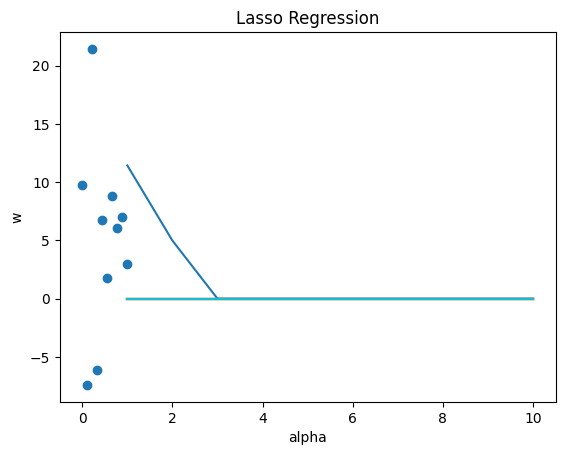

In [10]:
from matplotlib import pyplot as plt

%matplotlib inline

"""使用 LASSO 回归拟合并绘图
"""
from sklearn.linear_model import Lasso

alphas = np.linspace(1, 10, 10)
lasso_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)

plt.plot(alphas, lasso_coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Lasso Regression")

In [ ]:
# 当 alpha 取值越大时，正则项主导收敛过程，各系数趋近于 0。当 alpha 很小时，各系数波动幅度变大
# 看斜线